<a href="https://colab.research.google.com/github/alanngoulart/automacoes-sheets-colab/blob/main/Master_Index_Receitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ 🔹 SCRIPT COMPLETO – Master Index Receitas

Este notebook consolida dados de receitas de várias planilhas do Google Sheets para facilitar a busca e análise.

🔽 1. Nova Instalação e Configuração

In [14]:
## 1.1 Instalar Bibliotecas e Autenticar

!pip install gspread pandas gspread_dataframe
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import get_as_dataframe
import pandas as pd

In [15]:
## 1.2 Preparar Ambiente de Autenticação

import gspread
from google.colab import auth
auth.authenticate_user()

import google.auth
creds, _ = google.auth.default()
gc = gspread.authorize(creds)

🔽 2. Listagem de Fontes de Dados

Esta seção lista os links e nomes das abas das planilhas do Google Sheets que servem como bancos de dados de receitas.

In [16]:
## 2.1 Detalhes dos Bancos de Dados


bancos = [
    {
        'nome': 'Banco 1',
        'url': 'https://docs.google.com/spreadsheets/d/1b1xUNKUOzOHqkeQr_haLRKGxV9cteEWf1PhZrAlrmsc/edit?gid=1588121528#gid=1588121528',
        'aba': 'Index'
    },
    {
        'nome': 'Banco 2',
        'url': 'https://docs.google.com/spreadsheets/d/1OcRCqF7zn4cEtYfK0ct_Uuxjq6VzJy4FjquXlsDraR4/edit?gid=606996434#gid=606996434',
        'aba': 'Index'
    },
    {
        'nome': 'Banco 3',
        'url': 'https://docs.google.com/spreadsheets/d/1Vc0LTVany6o2pzd7Guft1iOnbG_F5oCyzPgDaazPV9w/edit?gid=1046856721#gid=1046856721',
        'aba': 'Index'
    },
    {
        'nome': 'Banco 4',
        'url': 'https://docs.google.com/spreadsheets/d/1OnCVNdnggduHYdgUJnKMC90amWxOOv4O_f056E74F8Y/edit?resourcekey=0-m9YUVrZZy9O4aWenqe5NkQ&gid=534196049#gid=534196049',
        'aba': 'Index'
    }
]

🔽 3. Consolidar Dados em DataFrame Mestre

Aqui, os dados de todas as abas 'Index' definidas nos bancos de dados são lidos e combinados em um DataFrame mestre.

In [17]:
## 3.1 Leitura e Concatenação dos Dados


dfs = []

for banco in bancos:
    sh = gc.open_by_url(banco['url'])
    ws = sh.worksheet(banco['aba'])
    df = get_as_dataframe(ws, evaluate_formulas=True)
    df['Banco'] = banco['nome']  # Adiciona coluna identificadora
    dfs.append(df)

# Concatena tudo em um único DataFrame
df_master = pd.concat(dfs, ignore_index=True)


In [18]:
## 3.2 Visualizar Colunas e Duplicatas


# Visualizar as colunas disponíveis
print("Colunas disponíveis no DataFrame consolidado:")
print(df_master.columns)


Colunas disponíveis no DataFrame consolidado:
Index(['Nome da Receita', 'Categoria', 'Banco de Dados', 'Banco', 'Unnamed: 0',
       'Unnamed: 1', 'Unnamed: 2', 'Sopa', 'Base', 'Molho / Vinagrete',
       'Acompanhamento', 'Legumes', 'Proteína Animal', 'Grãos', 'Saladas',
       'Cozinha Show', 'Mingau café da manhã', 'Prato quente café da manhã',
       'Bolos', 'Sobremesas', 'Café da tarde', 'Sanduíche', 'Toppings',
       'Sliced Fruit', 'Juice', 'Queijos'],
      dtype='object')


🔽 4. Ferramentas de Visualização (Links Clicáveis)

Define uma função que pode ser usada para formatar URLs como links clicáveis em um DataFrame.

In [19]:
## 4.1 Função `make_clickable`

from IPython.display import HTML

def make_clickable(val):
    return f'<a href="{val}" target="_blank">{val}</a>'


🔽 5. Preparação e Limpeza dos Dados para Análise

Esta seção transforma o formato dos dados e remove linhas vazias para análise.

In [20]:
## 5.1 Transformar para Formato Longo e Limpar

# Transformar df_master de wide para long
# Incluir a coluna 'Banco' como identificador

df_long = df_master.melt(id_vars=['Banco'], var_name='Categoria', value_name='Receita')

# Remover linhas vazias
df_long = df_long.dropna(subset=['Receita'])

🔽 6. Análise e Visualização (Exemplo: Contagem por Banco)

Demonstra como analisar e visualizar os dados consolidados, como a contagem de receitas por banco.

/tmp/ipython-input-21-2787744190.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recipe_counts_by_bank_filtered.index, y=recipe_counts_by_bank_filtered.values, palette="viridis")


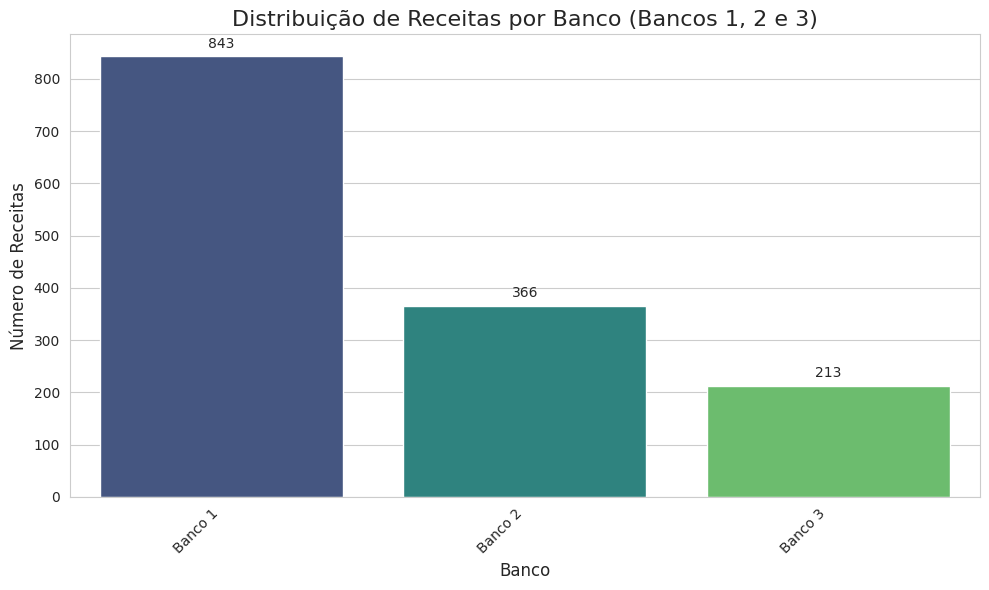

In [21]:
## 6.1 Contagem de Receitas por Banco (Bancos 1, 2 e 3)


import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# Calculate the count of recipes per bank for the filtered data
recipe_counts_by_bank_filtered = df_master_reconsolidated['Banco'].value_counts()

# Create a bar plot for recipe counts by bank
plt.figure(figsize=(10, 6))
sns.barplot(x=recipe_counts_by_bank_filtered.index, y=recipe_counts_by_bank_filtered.values, palette="viridis")

# Add titles and labels
plt.title('Distribuição de Receitas por Banco (Bancos 1, 2 e 3)', fontsize=16)
plt.xlabel('Banco', fontsize=12)
plt.ylabel('Número de Receitas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap

# Add the exact count on top of each bar
for index, value in enumerate(recipe_counts_by_bank_filtered.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# ## 6.2 Exibir DataFrame Consolidado (Bancos 1, 2 e 3)

# Você pode usar este DataFrame para filtrar e visualizar os dados como precisar.

# Display the consolidated DataFrame containing data from Banco 1, 2, and 3
print("DataFrame consolidado para Bancos 1, 2 e 3:")
display(df_master_reconsolidated)

DataFrame consolidado para Bancos 1, 2 e 3:


,Nome da receita,Categoria,Banco
0,Canja brasileira,SOPAS,Banco 1
1,Capeletti in Brodo,SOPAS,Banco 1
2,Creme de abóbora,SOPAS,Banco 1
3,Creme de abóbora com carne seca,SOPAS,Banco 1
4,Creme de aspargos com queijo cottage,SOPAS,Banco 1
...,...,...,...
1417,Bolo de maçã com canela,BOLOS,Banco 3
1418,Fundo de legumes,BASE / FUNDOS,Banco 3
1419,Quinoa vermelha com milho,GUARNIÇÕES VEG,Banco 3
1420,Mix de grãos,GUARNIÇÕES VEG,Banco 3


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [23]:
# Re-consolidate data from all banks, explicitly renaming columns based on common understanding (A=Nome, B=Categoria)
dfs_reconsolidated = []

for banco in bancos:
    sh = gc.open_by_url(banco['url'])
    ws = sh.worksheet(banco['aba'])
    # Assuming the first row contains headers for all sheets
    df_raw = get_as_dataframe(ws, evaluate_formulas=True, header=1)

    # Rename the first two columns as 'Nome da receita' and 'Categoria'
    if df_raw.shape[1] >= 2:
        df_processed = df_raw.rename(columns={
            df_raw.columns[0]: 'Nome da receita', # Assuming Column A is Recipe Name
            df_raw.columns[1]: 'Categoria'       # Assuming Column B is Category
        })

        # Add bank name and select relevant columns, dropping rows with no recipe name
        df_processed['Banco'] = banco['nome']
        df_processed = df_processed[['Nome da receita', 'Categoria', 'Banco']].dropna(subset=['Nome da receita']).copy()
        dfs_reconsolidated.append(df_processed)
    else:
        print(f"Skipping {banco['nome']} due to unexpected column structure (less than 2 columns).")


# Concatenate all into a single DataFrame
df_master_reconsolidated = pd.concat(dfs_reconsolidated, ignore_index=True)

print("DataFrame consolidado recriado com colunas renomeadas:")
display(df_master_reconsolidated.head())

# Identify duplicates based on 'Nome da receita' across all banks
recipe_name_counts_all = df_master_reconsolidated.groupby('Nome da receita').size().reset_index(name='count')
duplicate_recipe_names_all = recipe_name_counts_all[recipe_name_counts_all['count'] > 1]

# Get the list of duplicate recipe names
list_of_duplicate_recipe_names_all = duplicate_recipe_names_all['Nome da receita'].tolist()

# Filter the consolidated DataFrame to show all occurrences of these duplicate names
all_occurrences_of_duplicate_names_all = df_master_reconsolidated[
    df_master_reconsolidated['Nome da receita'].isin(list_of_duplicate_recipe_names_all)
].sort_values(by=['Nome da receita', 'Banco', 'Categoria'])

# Display all occurrences of recipes with duplicate names across all banks
print("\nTodas as ocorrências de receitas com nomes duplicados (em todos os bancos), incluindo Banco e Categoria:")
display(all_occurrences_of_duplicate_names_all[['Nome da receita', 'Banco', 'Categoria']])

DataFrame consolidado recriado com colunas renomeadas:


,Nome da receita,Categoria,Banco
0,Canja brasileira,SOPAS,Banco 1
1,Capeletti in Brodo,SOPAS,Banco 1
2,Creme de abóbora,SOPAS,Banco 1
3,Creme de abóbora com carne seca,SOPAS,Banco 1
4,Creme de aspargos com queijo cottage,SOPAS,Banco 1



Todas as ocorrências de receitas com nomes duplicados (em todos os bancos), incluindo Banco e Categoria:


,Nome da receita,Banco,Categoria
346,Abobrinha grelhada,Banco 1,LEGUMES
992,Abobrinha grelhada,Banco 2,GUARNIÇÕES
342,Abóbora assada,Banco 1,LEGUMES
987,Abóbora assada,Banco 2,GUARNIÇÕES
817,Arroz de cogumelos com acafrão e ervilha,Banco 1,GUARNIÇÕES VEG
...,...,...,...
896,Sopa provençal de legumes,Banco 2,SOPAS
147,Tofu grelhado,Banco 1,GUARNIÇÕES
1173,Tofu grelhado,Banco 2,TOPPINGS
827,Wrap de Tomate Seco com Rucula,Banco 1,SANDUICHES


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**🔽** 7. Compartilhamento e Uso em Equipe

Esta seção fornece instruções sobre como compartilhar o notebook e as planilhas com a equipe e como executar o código.

## 7.1 Compartilhar o Notebook 🤝

> **Importante:** 🔑 Para compartilhar o notebook no Google Colab com os membros da equipe, siga estes passos:

1. Abra o notebook no Google Colab. 📄
2. Clique no botão "**Compartilhar**" ↗️ (geralmente localizado no canto superior direito da tela).
3. Na caixa de diálogo que aparece, insira os endereços de e-mail dos membros da equipe com quem você deseja compartilhar o notebook. 📧
4. Defina as **permissões de acesso** para cada membro. Você pode escolher entre "Leitor" (para apenas visualizar o notebook) 👀, "Comentador" (para visualizar e adicionar comentários) 💬 ou "**Editor**" (para permitir que editem o código e o conteúdo do notebook) ✍️. Para que eles possam executar o notebook, eles precisarão ter permissões de "**Editor**".
5. Opcionalmente, você pode adicionar uma mensagem para os membros da equipe.
6. Clique em "**Enviar**" para compartilhar o notebook. ✅

Os membros da equipe receberão um e-mail com um link para o notebook.

## 7.2 Gerenciar Autenticação

Para que cada membro da equipe possa executar o notebook e acessar os dados das planilhas do Google Sheets, eles precisarão autenticar-se na sua conta Google no ambiente do Google Colab.

> **Importante:** 🔑 Este processo é iniciado automaticamente pela linha de código `auth.authenticate_user()` na seção 1.1 do notebook. Ao executar essa célula, uma janela ou link de autenticação do Google será exibido. O usuário deverá seguir as instruções para fazer login com sua conta Google e autorizar o Google Colab a acessar seus arquivos no Google Drive (onde as planilhas estão armazenadas).

**Ponto Chave:** 🤝 É fundamental que a conta Google utilizada para a autenticação no Google Colab seja a **mesma conta** com a qual as planilhas do Google Sheets foram compartilhadas. As permissões de acesso aos dados nas planilhas são baseadas na conta autenticada. Se a conta não tiver permissão para ler as planilhas, o notebook não conseguirá acessá-las, mesmo que o notebook em si tenha sido compartilhado.

Portanto, certifique-se de que todos os membros da equipe:
1. Tenham as planilhas do Google Sheets compartilhadas com suas contas Google. 📧✅
2. Autentiquem-se no Google Colab usando essas mesmas contas Google quando executarem o notebook. ✅

## 7.3 Compartilhar as Planilhas

Além de compartilhar o notebook do Colab, é essencial garantir que as planilhas do Google Sheets que contêm os dados também estejam compartilhadas corretamente com os membros da equipe. 🤝

Para compartilhar uma planilha do Google Sheets, siga estes passos para cada planilha usada no notebook (neste caso, as planilhas dos 'bancos' definidos): 📄📊

1. Abra a planilha específica no Google Sheets.
2. Clique no botão '**Compartilhar**' (geralmente localizado no canto superior direito da tela, assim como no Colab). ↗️
3. Na caixa de diálogo de compartilhamento, insira os endereços de e-mail dos membros da equipe. 📧
4. **Defina as permissões de acesso:** Para que o notebook possa ler os dados das planilhas, os membros da equipe precisam ter pelo menos permissões de '**Leitor**' ou '**Comentador**'. Se eles precisarem modificar os dados de origem nas planilhas diretamente, você pode conceder permissões de '**Editor**'. 👀✍️
5. Clique em '**Enviar**' para compartilhar a planilha. ✅

> **É crucial que as contas Google usadas pelos membros da equipe para autenticação no Google Colab sejam as mesmas contas que você usou para compartilhar as planilhas do Google Sheets.** O acesso aos dados no notebook depende diretamente das permissões que cada usuário tem nas planilhas no Google Drive. 🔑

## 7.5 Considerar Opções de Automação e Deployment (Opcional) 🚀

Considerando cenários onde a execução manual do notebook pode se tornar ineficiente, como no caso de atualizações frequentes dos dados nas planilhas do Google Sheets, automatizar a execução do processo de consolidação pode trazer grandes benefícios. ✨

A automação da execução pode economizar tempo significativo para a equipe, eliminando a necessidade de abrir o Colab e rodar as células manualmente a cada atualização. Além disso, garante maior consistência nos resultados, pois o processo será executado sempre da mesma forma, reduzindo a chance de erros manuais. ✅

Existem diversas opções para automatizar ou implantar a solução de forma mais robusta:

*   **Google Cloud Functions ou Cloud Run:** ☁️ Podem ser usadas para executar o código Python do notebook sob demanda ou em resposta a eventos, como uma atualização em uma das planilhas (configurando triggers). Isso elimina a necessidade de abrir o Colab manualmente.
*   **Google Cloud Scheduler:** ⏰ Pode ser configurado para acionar a execução de uma Cloud Function ou serviço no Cloud Run em intervalos regulares (por exemplo, diariamente, semanalmente), garantindo que os dados consolidados estejam sempre atualizados.
*   **Google Apps Script:** 📝 Uma opção mais simples, diretamente integrada ao Google Sheets e Google Drive. Pode ser útil para automações mais básicas acionadas por eventos dentro do próprio Sheets, mas pode ter limitações para processamentos de dados mais complexos ou que exijam bibliotecas Python específicas.
*   **Containerização (Docker):** 🐳 Empacotar o código e suas dependências em um contêiner Docker facilita a implantação em diferentes ambientes, seja na nuvem (como Google Cloud Run) ou em servidores próprios.
*   **Plataformas de orquestração (como Apache Airflow):** ⚙️ Para fluxos de trabalho mais complexos, que envolvam múltiplas etapas, dependências ou integrações com outros sistemas, uma ferramenta de orquestração pode ser utilizada para gerenciar a execução e monitorar o pipeline de dados.

A escolha da melhor opção de automação ou deployment dependerá de fatores como a frequência com que os dados das planilhas são atualizados, a complexidade do processamento realizado no notebook, os recursos técnicos disponíveis na equipe e o orçamento para serviços de nuvem.

> Para este projeto inicial, a execução manual no Google Colab é um ótimo ponto de partida e totalmente viável. A automação pode ser considerada como uma melhoria futura, à medida que as necessidades do projeto e da equipe evoluírem. 👍

In [24]:
# Salvar o DataFrame consolidado em um arquivo Excel
excel_filename = 'master_index_receitas.xlsx'
df_master_reconsolidated.to_excel(excel_filename, index=False) # index=False para não escrever o índice do DataFrame no Excel

print(f"DataFrame consolidado salvo com sucesso em '{excel_filename}'")

# O arquivo 'master_index_receitas.xlsx' agora está disponível no ambiente de arquivos do Colab.
# Você pode baixá-lo clicando no ícone de pasta à esquerda, navegando até o arquivo e clicando nos três pontos.

DataFrame consolidado salvo com sucesso em 'master_index_receitas.xlsx'
